In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import collections
import nltk

Импорт собранных публикаций для всех авиакомпаний


In [2]:
df = pd.read_csv('data/Airlines.csv')
df.drop_duplicates(subset =["text","userID"], keep = 'first', inplace = True)
airways = df['target'].unique()
print(df)

                                                     text             target  \
0         the 9.11 magnitude not "a time of our choosi...  american airlines   
1       . ✈ is bringing the cities of london and bosto...  american airlines   
2       e mcknight kauffer's ireland - a bas books hig...  american airlines   
3       now playing on the live365 app: i dream of you...  american airlines   
4       on 2019-02-16,  (r-tyler)'s' "louie gohme for ...  american airlines   
...                                                   ...                ...   
151040  six hours delay after inadveent emergency slid...    virgin airlines   
151041  daily aviation news w/ simulation and aviation...    virgin airlines   
151042  virgin galactic spaceshiptwo unity arrives at ...    virgin airlines   
151043  six hours delay after inadveent emergency slid...    virgin airlines   
151044  six hours delay after inadveent emergency slid...    virgin airlines   

                       date  rtCount  l

In [3]:
#Вывод наиболее популярных пользователей
american_airlines = df.loc[df['target']=='american airlines']
american_airlines['pos'] = american_airlines['prediction'].apply(lambda x: 1 if x=='positive' else 0)
american_airlines['neg'] = american_airlines['prediction'].apply(lambda x: 1 if x=='negative' else 0)

users = american_airlines[['userScreenName','text','pos','neg']].groupby('userScreenName').agg({'text':'count',
                                                                                                'pos':'sum','neg':'sum'})
users = users.sort_values(by='text',ascending=False)[:20]
print(users)
#users.to_csv('users.csv')

                 text  pos  neg
userScreenName                 
JetWjst          1016  728  288
flutterben        390  185  205
MightyTravels     313   29  284
BoardingArea      264  191   73
RockCheetah       208  132   76
FortyTravel       121   83   38
tmj_dfw_it        110   73   37
SmartHomes__      110  109    1
British_Airways   104   66   38
EINAirlineNews    102   53   49
dallasnews         98   47   51
EricRuliffson      97   54   43
e_russell          96   63   33
frontrowpop        92   39   53
blogosum           91   53   38
wallabycard        90   63   27
thepointsguy       84   57   27
Air101blog         84   71   13
justtraveluk       79   52   27
WorldPassport      79   63   16


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [4]:
#Вывод наиболее популярных публикаций
pop_users_rt = american_airlines[['userScreenName','rtCount','likeCount','pos','neg']].groupby('userScreenName').agg({'rtCount':'sum',
                                                                                                'pos':'sum','neg':'sum'})
pop_users_rt = pop_users_rt.sort_values(by='rtCount', ascending=False)[:20]
#pop_users_rt.to_csv('pop_users_rt.csv')
pop_users_like = american_airlines[['userScreenName','rtCount','likeCount','pos','neg']].groupby('userScreenName').agg({'likeCount':'sum',
                                                                                                'pos':'sum','neg':'sum'})
pop_users_like = pop_users_like.sort_values(by='likeCount', ascending=False)[:20]
#pop_users_like.to_csv('pop_users_like.csv')

print(pop_users_rt)
print(pop_users_like)

                 rtCount  pos  neg
userScreenName                    
realDonaldTrump    23351    1    0
baimcpher          21939    1    0
TommyNoel           5298    2    0
TimMurtaugh         4319    2    1
NBCDFW              3683    9   11
AACenter            2210   25   10
ACTBrigitte         2089    0    1
BMcAdory9           2045    1    1
BenAbbottTX         1976    7    5
CNN                 1877   10   10
Breaking911         1571    2    0
paulsperry_         1443    0    1
RSBNetwork          1399    2    0
jesus_jimz          1272    1    0
BNONews             1255    0    1
OANN                1241    2    0
CNBCnow             1122    3    6
IPOT1776             912    1    1
prayingmedic         907    0    1
vivekagnihotri       904    1    0
                 likeCount  pos  neg
userScreenName                      
baimcpher           223347    1    0
realDonaldTrump     105204    1    0
TommyNoel            14011    2    0
TimMurtaugh          12493    2    1
NBCDFW  

In [5]:
#Функция стандартизации текста
def  standardize_text (df, text_field):
    df['clean'] = df[text_field].str.replace(r"http\S+", "")
    df['clean'] = df[text_field].str.replace(r"http", "")
    df['clean'] = df[text_field].str.replace(r"@\S+", "")
    df['clean'] = df[text_field].str.replace(r"@", "at")
    df['clean'] = df[text_field].str.lower()
    df['clean'] = df[text_field].str.replace(r"rt", "")
    df['clean'] = df[text_field].str.replace(r"[\U0001F600-\U0001F64F]","")
    df['clean'] = df[text_field].str.replace(r"[\U0001F300-\U0001F5FF]", "")
    df['clean'] = df[text_field].str.replace(r"[\U0001F680-\U0001F6FF]", "")
    df['clean'] = df[text_field].str.replace(r"[\U0001F1E0-\U0001F1FF]", "")
    return df

df = standardize_text (df, 'text')

Число позитивных и негативных публикаций по каждой компании

In [6]:
#Подсчёт кол-ва негативных и позитивных публикаций по каждой компании
numPos =[]
numNeg = []
for company in airways:
    c = collections.Counter(df.loc[df['target'] == company]['prediction'])
    numPos.append(c['positive'])
    numNeg.append(c['negative'])

Относительное число позитивных и негативных публикаций по каждой компании (нормированный график)

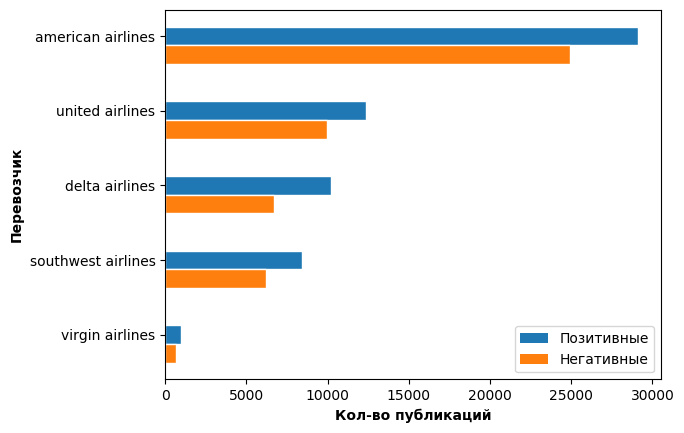

In [45]:
#Параметры диаграммы
r1 = np.arange(len(numPos))
r2 = [x + barWidth for x in r1]

#Сортировка по убыванию кол-ва публикаций
sortDF = pd.DataFrame({'title':airways,'numPos':numPos,'numNeg':numNeg})
sortDF['numTotal'] = sortDF['numPos'] + sortDF['numNeg']
sortDF = sortDF.sort_values(by='numTotal', ascending=False)

#Построение графика
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(sortDF['title'].values))
ax.barh(r1, sortDF['numPos'], color='#1F78B4', height=0.25, edgecolor='white', label='Позитивные')
ax.barh(r2, sortDF['numNeg'], color='#FE7F0E', height=0.25, edgecolor='white', label='Негативные')
ax.set_yticks(y_pos)
ax.set_yticklabels(sortDF['title'])
ax.invert_yaxis()
ax.set_xlabel('Кол-во публикаций',fontweight='bold')
ax.set_ylabel('Перевозчик',fontweight='bold')
plt.legend((p1[0], p2[0]), ('Позитивные', 'Негативные'),loc=4)
plt.show()

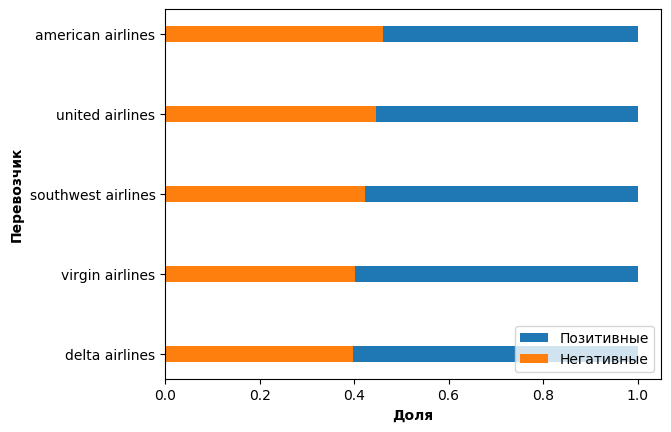

In [43]:
#нормирование данных
numPos = np.array(numPos)
numNeg = np.array(numNeg)
n_numPos = numPos /(numPos+numNeg)
n_numNeg = numNeg /(numPos+numNeg)
N = 5
posMeans = tuple(n_numPos)
negMeans = tuple(n_numNeg)
ind = np.arange(N)
width = 0.2
height = 0.2

#Сортировка по убыванию относительного числа негативных публикаций
sortDF = pd.DataFrame({'title':airways,'posMeans':posMeans,'negMeans':negMeans})
sortDF = sortDF.sort_values(by='negMeans', ascending=False)

#Построение графика
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(sortDF['title'].values))
ax.barh(ind, sortDF['negMeans'], height,color='#FE7F0E')
ax.barh(ind, sortDF['posMeans'], height,color='#1F78B4',left=sortDF['negMeans'])
ax.set_yticks(y_pos)
ax.set_yticklabels(sortDF['title'])
ax.invert_yaxis()
ax.set_xlabel('Доля',fontweight='bold')
ax.set_ylabel('Перевозчик',fontweight='bold')
plt.legend((p1[0], p2[0]), ('Позитивные', 'Негативные'),loc=4)
plt.show()

Лояльность по каждой компании
Заметка: Лояльность = кол-во позитвных публикаций/кол-во негативных публикаций

Динамические графики изменения лояльности

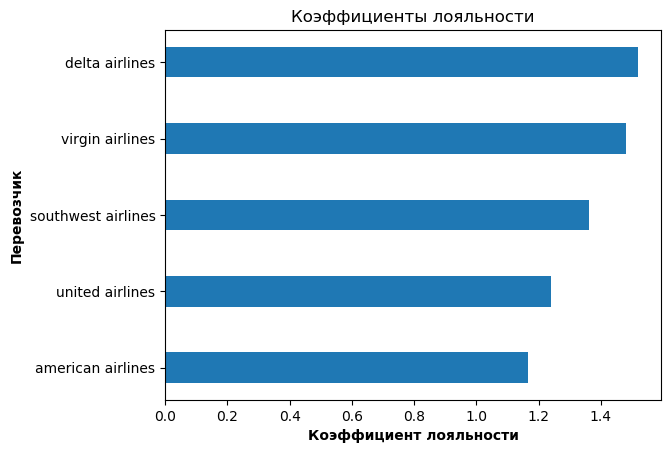

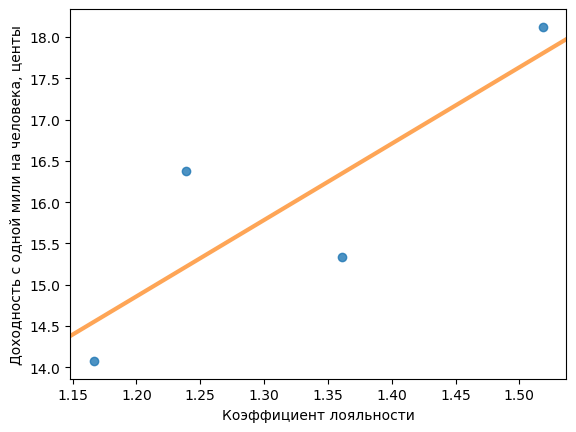

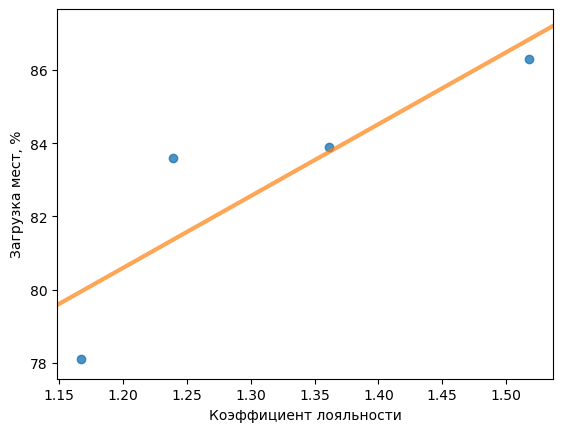

In [18]:
#Подсчёт показателя лояльности
numPos = np.array(numPos)
numNeg = np.array(numNeg)
n_loyality = numPos /numNeg

#Парметры диаграммы
N = 5
lMeans = tuple(n_loyality)
ind = np.arange(N)   
width = 0.2       

#Сортировка по убыванию лояльности
sortDF = pd.DataFrame({'title':airways,'lMeans':lMeans})
sortDF = sortDF.sort_values(by='lMeans', ascending=False)

#Диаграмма коэффициентов лояльности
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(sortDF['title'].values))
ax.barh(y_pos, sortDF['lMeans'], align='center',height=0.4,color='#1F78B4')
ax.set_yticks(y_pos)
ax.set_yticklabels(sortDF['title'])
ax.invert_yaxis()
ax.set_xlabel('Коэффициент лояльности', fontweight='bold')
ax.set_ylabel('Перевозчик', fontweight='bold')
ax.set_title('Коэффициенты лояльности')
plt.show()

#Добавление операционных показателей деятельности
airwaysDF = pd.DataFrame({'title':['virgin airlines','american airlines',
                                 'delta airlines','united airlines',
                                 'southwest airlines'],
                        'loadFactor':[80,78.1,86.3,83.6,83.9],
                        'yield':['NaN',14.08,18.12,16.38,15.34]})
resultDF = pd.merge(sortDF, airwaysDF, on='title')
resultDF = resultDF.set_index('title')
resultDF = resultDF.loc[['delta airlines','southwest airlines',
                  'united airlines','american airlines']]

#Построение точечной дигарммы с регрессией по доходности на лояльность
sns.regplot(x=resultDF['lMeans'], y=resultDF['yield'], 
            line_kws={"color":"#FE7F0E","alpha":0.7,"lw":3},ci=None)
plt.xlabel('Коэффициент лояльности')
plt.ylabel('Доходность с одной мили на человека, центы')
plt.show()

#Построение точечной дигарммы с регрессией по загрузке мест на лояльность
sns.regplot(x=resultDF['lMeans'], y=resultDF['loadFactor'], 
            line_kws={"color":"#FE7F0E","alpha":0.7,"lw":3},ci=None)
plt.xlabel('Коэффициент лояльности')
plt.ylabel('Загрузка мест, %')
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/

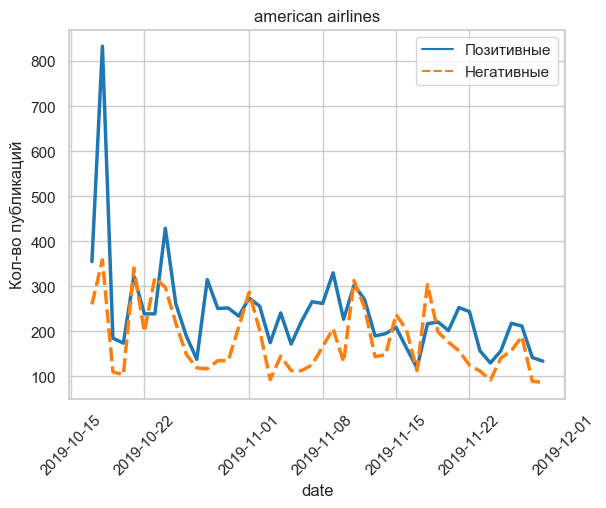

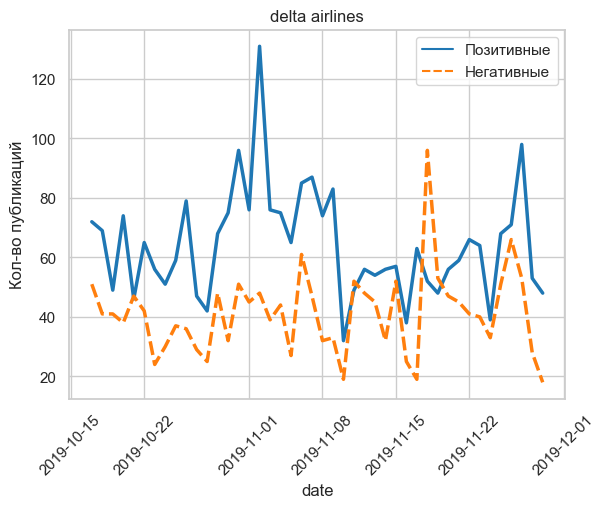

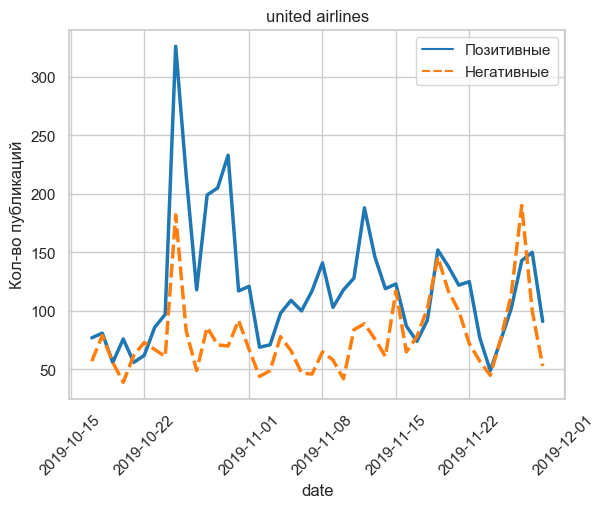

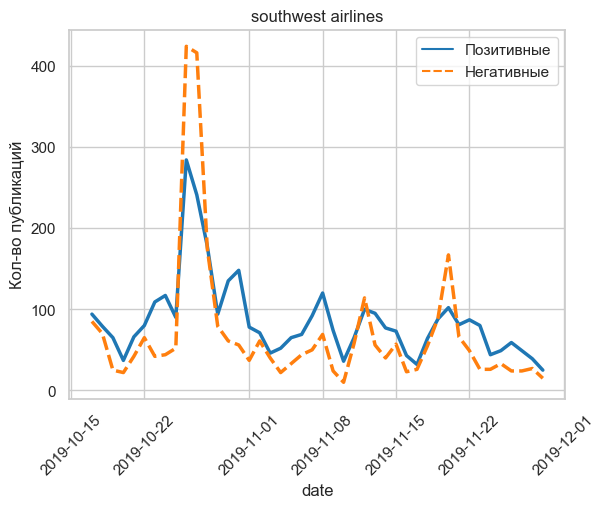

southwest airlines


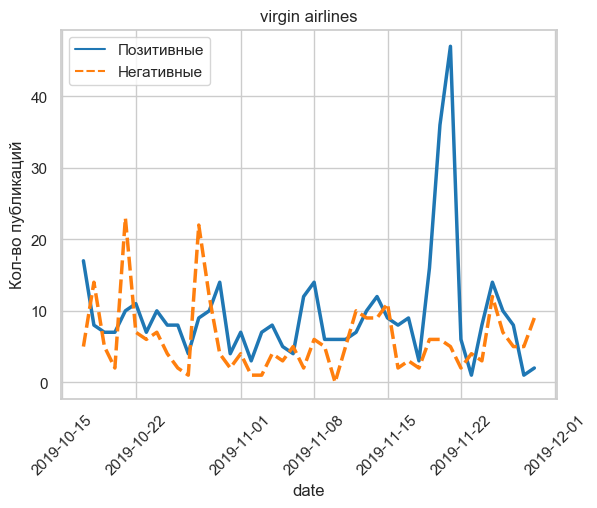

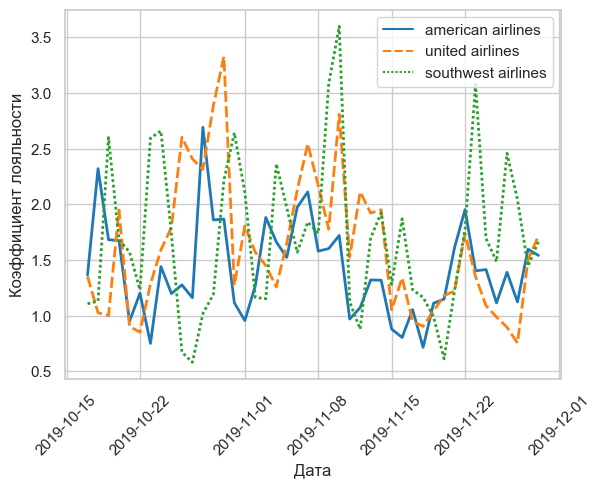

american airlines     1.416703
united airlines       1.611989
southwest airlines    1.700755
dtype: float64
american airlines     0.424206
united airlines       0.619702
southwest airlines    0.696737
dtype: float64


In [10]:
first = True

for company in airways:
    c_df = df.loc[df['target'] == company]
    df_date = c_df[['date', 'prediction']]
    df_date['date'] = pd.to_datetime(df_date['date'], errors='coerce')
    df_date['pos'] = df_date['prediction'].apply(lambda x: 1 if x == 'positive' else 0)
    df_date['neg'] = df_date['prediction'].apply(lambda x: 1 if x == 'negative' else 0)
    del df_date['prediction']
    df_date['date'] = df_date['date'].dt.date
    df_date = df_date.groupby(['date']).sum()
    plt.figure()
    sns.set(style="whitegrid")
    df44 = df_date[:44]
    df44 = df44.rename(columns={"pos": "Позитивные", "neg": "Негативные"})
    sns.lineplot(data=df44, palette="tab10", linewidth=2.5)
    plt.title(company)
    plt.ylabel('Кол-во публикаций')
    plt.xticks(rotation=45)
    plt.show()
    if first == True:
        loyality = pd.DataFrame({'date': df_date.index.values})
        first = False
        c_df = df_date['pos'].index.values
        idx = pd.Index(c_df)
    idx2 = idx.difference(df_date['pos'].index.values)
    idx2 = [i for i in idx2]
    if len(idx2) != 0:
        print(company)
        df3 = pd.DataFrame({'date':idx2,'pos':1,'neg':1})
        df3 = df3.set_index('date')
        df_date = df_date.append(df3)
        
    loyality[company] = (df_date['pos'] / df_date['neg']).values

#Общий график для трёх наиболее крупных компаний    
loyality = loyality.set_index('date')[:44]
loyality= loyality[['american airlines','united airlines','southwest airlines']]
sns.lineplot(data=loyality, palette="tab10", linewidth=2)
plt.xlabel('Дата')
plt.ylabel('Коэффициент лояльности')
plt.xticks(rotation=45)
plt.show()

#Среднее значение лояльности и стандартное отклонение
print(loyality[['american airlines','united airlines','southwest airlines']].mean(axis=0))
print(loyality[['american airlines','united airlines','southwest airlines']].std(axis=0))

In [11]:
#Функция токенизации
def token(textcol):
    newcol = []
    for text in textcol:
        tokenizer = nltk.RegexpTokenizer(r'\w+')
        newcol.append(" ".join(tokenizer.tokenize(text)))
    return newcol

#Вспомогательная фунцция изменения ширины
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)

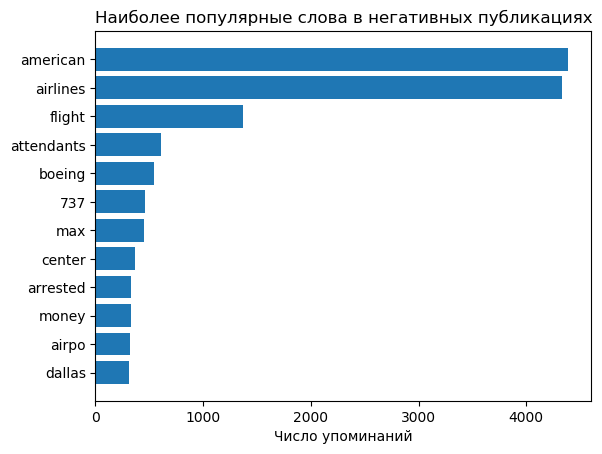

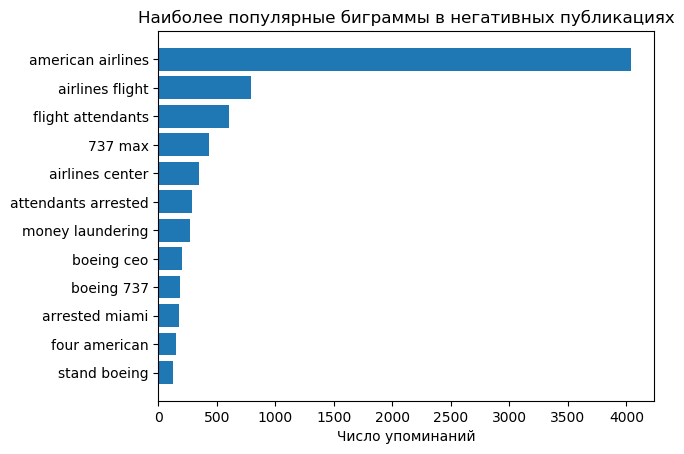

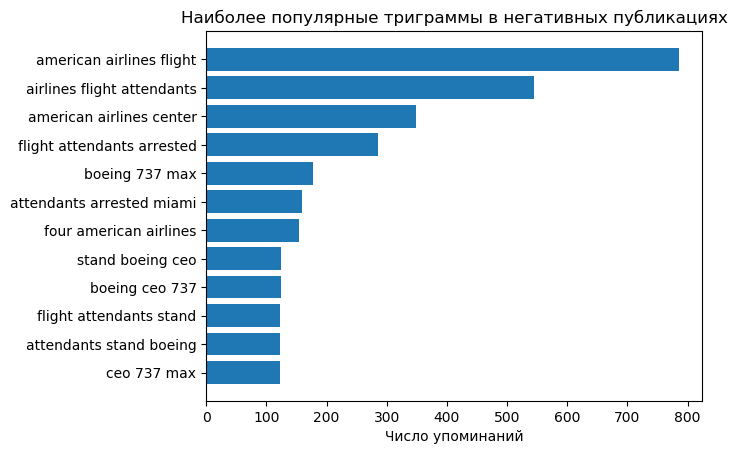

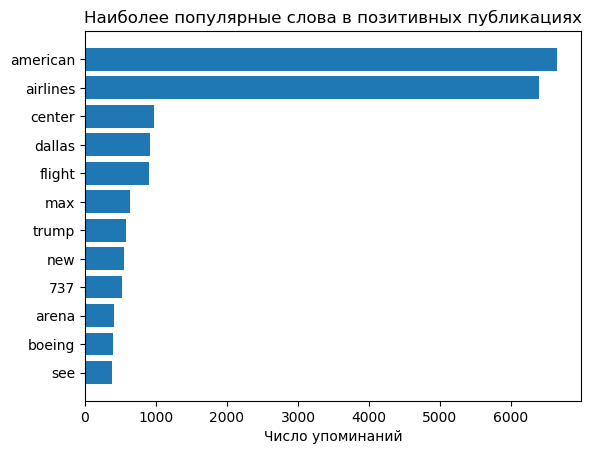

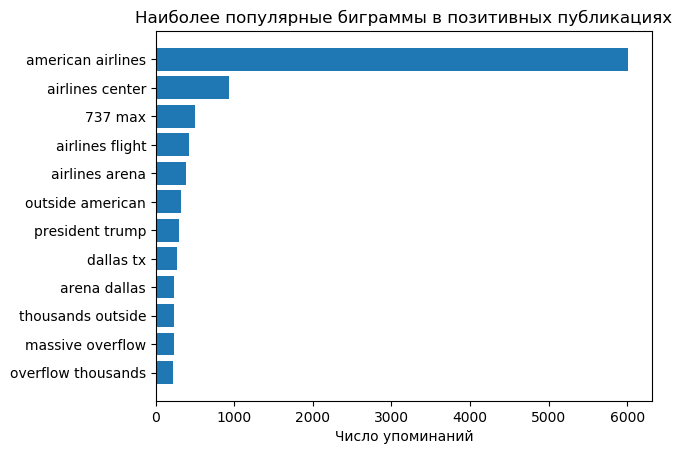

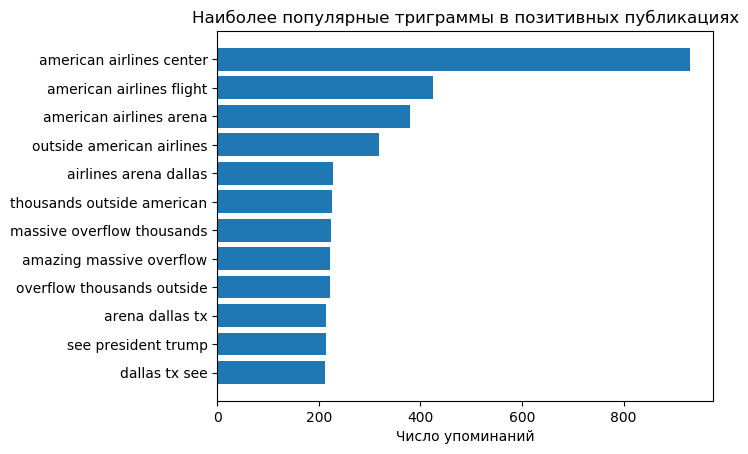

In [12]:
for sentiment in ['negative', 'positive']:
    for ngram in ['uni', 'bi', 'tri']:
        if sentiment == 'negative':
            sentimentText = 'негативных'
        else:
            sentimentText = 'позитивных'
        if ngram == 'uni':
            ngramText = 'слова'
        elif ngram == 'bi':
            ngramText = 'биграммы'
        else:
            ngramText = 'триграммы'
        gram_df = pd.read_csv('data/ngrams/American_{}_{}'.format(ngram, sentiment), usecols=['ngram', 'count']).loc[:12]
        gram_df['ngram'] = token(gram_df['ngram'].values)

        data_g = gram_df[:12]
        plt.rcdefaults()
        fig, ax = plt.subplots()

        ngrams = data_g['ngram'].values
        y_pos = np.arange(len(ngrams))
        performance = data_g['count'].values

        ax.barh(y_pos, performance, align='center')
        ax.set_yticks(y_pos)
        ax.set_yticklabels(ngrams)
        ax.invert_yaxis()
        ax.set_xlabel('Число упоминаний')
        ax.set_title("Наиболее популярные {} в {} публикациях".format(ngramText,sentimentText))

        plt.show()